In [2]:
import geopandas as gpd
import pandas as pd
import os

In [79]:
prediction_df = pd.read_parquet('Nashik_BuildingFootprints.parquet') #Last dataset with predicted type of building
settlements_gdf = gpd.read_file('Nashik_neuralNetwork_50_infromal_detection.geojson')

In [81]:
prediction_gdf = gpd.GeoDataFrame(
    prediction_df,
    geometry=gpd.GeoSeries.from_wkb(prediction_df['geometry'])
)

In [86]:
settlements_gdf.head(4) #check that geometry is using 4326

,confidence,class,fill,stroke,geometry
0,1.805664e-35,formal,#1591EA,#1591EA,"POLYGON ((73.69816 19.9869, 73.69816 19.98735,..."
1,1.805664e-35,formal,#1591EA,#1591EA,"POLYGON ((73.69816 19.98735, 73.69816 19.9878,..."
2,1.536511e-33,formal,#1591EA,#1591EA,"POLYGON ((73.69816 19.9878, 73.69816 19.98825,..."
3,1.805664e-35,formal,#1591EA,#1591EA,"POLYGON ((73.69861 19.9869, 73.69861 19.98735,..."


In [37]:
#geometries = gpd.GeoSeries.from_wkb(prediction_df['geometry'])
#prediction_df = gpd.GeoDataFrame(prediction_df, geometry=geometries, crs=4326)

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

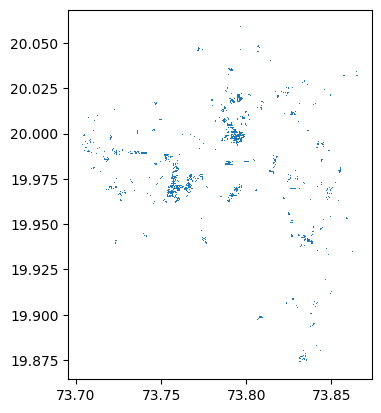

In [87]:
settlements_gdf[settlements_gdf['class']=='informal'].plot()
settlements_gdf.crs

In [88]:
prediction_gdf.head(5) #check that geometry is 4326

,osm_id,building_faces,floors,area_in_meters,gfa_in_meters,vida_confidence,perimeter_in_meters,ml_confidence,longitude,latitude,...,osm_name,osm_building,ml_model,id,ghsl_smod,footprint_source,classification_type,__index_level_0__,geometry,geometry_bbox
0,0,4,1,21.8533,21.8533,0.7517,18.745373,0.7833,73.469631,20.077686,...,,,HybridArchitecture_CFG001_India_Maharashtra_De...,73.46963063:20.07768624,Very Low Density Rural Grids (Mostly Uninhabit...,google,res,18890,"MULTIPOLYGON (((73.46966 20.0777, 73.46962 20....","{'xmin': 73.46959686279297, 'ymin': 20.0776576..."
1,0,4,1,14.7069,14.7069,0.7123,15.342787,0.0000,73.470704,20.056667,...,,,CustomArchitecture_CFG010_DenseNet121_dt01_27_...,73.47070449:20.05666725,Very Low Density Rural Grids (Mostly Uninhabit...,google,res,18892,"MULTIPOLYGON (((73.47072 20.05665, 73.47072 20...","{'xmin': 73.4706802368164, 'ymin': 20.05664634..."
2,0,4,1,49.1090,49.1090,0.8467,28.043327,0.9164,73.469338,20.055156,...,,,HybridArchitecture_CFG001_India_Maharashtra_De...,73.46933757:20.0551564,Very Low Density Rural Grids (Mostly Uninhabit...,google,res,18899,"MULTIPOLYGON (((73.46938 20.05518, 73.46931 20...","{'xmin': 73.46929168701172, 'ymin': 20.0551204..."
3,0,4,1,35.8623,35.8623,0.7773,23.987649,0.8505,73.470720,20.056520,...,,,HybridArchitecture_CFG001_India_Maharashtra_De...,73.47071992:20.05651967,Very Low Density Rural Grids (Mostly Uninhabit...,google,res,18912,"MULTIPOLYGON (((73.47076 20.05654, 73.4707 20....","{'xmin': 73.47067260742188, 'ymin': 20.0564861..."
4,0,4,1,41.8308,41.8308,0.8141,26.097504,0.7773,73.475654,20.080670,...,,,HybridArchitecture_CFG001_India_Maharashtra_De...,73.4756535:20.08066981,Very Low Density Rural Grids (Mostly Uninhabit...,google,res,18915,"MULTIPOLYGON (((73.4757 20.08067, 73.47564 20....","{'xmin': 73.4756088256836, 'ymin': 20.08062553..."


In [89]:
columns_to_add = ['confidence', 'class', 'geometry']
settlements_subset = settlements_gdf[columns_to_add]

In [91]:
merged_gdf = gpd.sjoin(prediction_gdf, settlements_subset, how="left", predicate="intersects")

In [92]:
merged_gdf = merged_gdf.drop(columns=['index_right'])

In [93]:
merged_gdf

,osm_id,building_faces,floors,area_in_meters,gfa_in_meters,vida_confidence,perimeter_in_meters,ml_confidence,longitude,latitude,...,ml_model,id,ghsl_smod,footprint_source,classification_type,__index_level_0__,geometry,geometry_bbox,confidence,class
0,0,4,1,21.8533,21.8533,0.7517,18.745373,0.7833,73.469631,20.077686,...,HybridArchitecture_CFG001_India_Maharashtra_De...,73.46963063:20.07768624,Very Low Density Rural Grids (Mostly Uninhabit...,google,res,18890,"MULTIPOLYGON (((73.46966 20.0777, 73.46962 20....","{'xmin': 73.46959686279297, 'ymin': 20.0776576...",NaN,NaN
1,0,4,1,14.7069,14.7069,0.7123,15.342787,0.0000,73.470704,20.056667,...,CustomArchitecture_CFG010_DenseNet121_dt01_27_...,73.47070449:20.05666725,Very Low Density Rural Grids (Mostly Uninhabit...,google,res,18892,"MULTIPOLYGON (((73.47072 20.05665, 73.47072 20...","{'xmin': 73.4706802368164, 'ymin': 20.05664634...",NaN,NaN
2,0,4,1,49.1090,49.1090,0.8467,28.043327,0.9164,73.469338,20.055156,...,HybridArchitecture_CFG001_India_Maharashtra_De...,73.46933757:20.0551564,Very Low Density Rural Grids (Mostly Uninhabit...,google,res,18899,"MULTIPOLYGON (((73.46938 20.05518, 73.46931 20...","{'xmin': 73.46929168701172, 'ymin': 20.0551204...",NaN,NaN
3,0,4,1,35.8623,35.8623,0.7773,23.987649,0.8505,73.470720,20.056520,...,HybridArchitecture_CFG001_India_Maharashtra_De...,73.47071992:20.05651967,Very Low Density Rural Grids (Mostly Uninhabit...,google,res,18912,"MULTIPOLYGON (((73.47076 20.05654, 73.4707 20....","{'xmin': 73.47067260742188, 'ymin': 20.0564861...",NaN,NaN
4,0,4,1,41.8308,41.8308,0.8141,26.097504,0.7773,73.475654,20.080670,...,HybridArchitecture_CFG001_India_Maharashtra_De...,73.4756535:20.08066981,Very Low Density Rural Grids (Mostly Uninhabit...,google,res,18915,"MULTIPOLYGON (((73.4757 20.08067, 73.47564 20....","{'xmin': 73.4756088256836, 'ymin': 20.08062553...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365799,0,4,2,29.2196,58.4392,0.7911,22.594353,0.6568,73.766260,19.818517,...,HybridArchitecture_CFG001_India_Maharashtra_De...,73.76626006:19.81851714,Low Density Rural Grids Cells (Dispersed Rural...,google,res,2601254,"MULTIPOLYGON (((73.76627 19.81855, 73.76624 19...","{'xmin': 73.7662353515625, 'ymin': 19.81848144...",NaN,NaN
365800,0,12,3,228.8360,686.5080,0.7911,72.666599,0.6112,73.806301,19.875989,...,HybridArchitecture_CFG001_India_Maharashtra_De...,73.80630089:19.87598852,Suburban Or Peri-Urban Cells (Suburb),google,res,2601255,"MULTIPOLYGON (((73.80641 19.87598, 73.80637 19...","{'xmin': 73.8061752319336, 'ymin': 19.87591934...",NaN,NaN
365801,0,10,1,899.2895,899.2895,0.8536,181.977531,0.0000,73.800434,19.848991,...,-,73.80043436:19.84899095,None,google,inactive,2601259,"MULTIPOLYGON (((73.80072 19.84882, 73.80051 19...","{'xmin': 73.80015563964844, 'ymin': 19.8487339...",NaN,NaN
365802,0,4,1,113.8706,113.8706,0.9161,45.191116,0.7408,73.787879,19.828535,...,HybridArchitecture_CFG001_India_Maharashtra_De...,73.78787861:19.82853505,Suburban Or Peri-Urban Cells (Suburb),google,res,2601265,"MULTIPOLYGON (((73.78788 19.82861, 73.78782 19...","{'xmin': 73.78781127929688, 'ymin': 19.8284587...",NaN,NaN


In [94]:
merged_gdf.rename(columns={
    'confidence_right': 'confidence_settlement_clasification',
    'class': 'settlement_clasification'
}, inplace=True)

<Axes: >

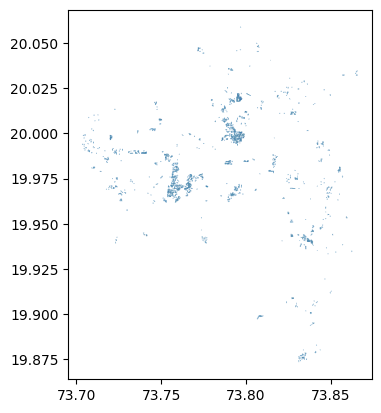

In [95]:
merged_gdf[merged_gdf['settlement_clasification']=='informal'].plot()

In [96]:
len(merged_gdf)

492541

In [97]:
gdf_no_duplicates = merged_gdf.drop_duplicates(subset='geometry', keep='first')

In [98]:
len(gdf_no_duplicates) #Check it matches original len

365804

In [101]:
gdf_no_duplicates.to_parquet('Nashik_informal_settlement.parquet')

In [100]:
gdf_no_duplicates.to_crs(4326)

,osm_id,building_faces,floors,area_in_meters,gfa_in_meters,vida_confidence,perimeter_in_meters,ml_confidence,longitude,latitude,...,ml_model,id,ghsl_smod,footprint_source,classification_type,__index_level_0__,geometry,geometry_bbox,confidence,settlement_clasification
0,0,4,1,21.8533,21.8533,0.7517,18.745373,0.7833,73.469631,20.077686,...,HybridArchitecture_CFG001_India_Maharashtra_De...,73.46963063:20.07768624,Very Low Density Rural Grids (Mostly Uninhabit...,google,res,18890,"MULTIPOLYGON (((73.46966 20.0777, 73.46962 20....","{'xmin': 73.46959686279297, 'ymin': 20.0776576...",NaN,NaN
1,0,4,1,14.7069,14.7069,0.7123,15.342787,0.0000,73.470704,20.056667,...,CustomArchitecture_CFG010_DenseNet121_dt01_27_...,73.47070449:20.05666725,Very Low Density Rural Grids (Mostly Uninhabit...,google,res,18892,"MULTIPOLYGON (((73.47072 20.05665, 73.47072 20...","{'xmin': 73.4706802368164, 'ymin': 20.05664634...",NaN,NaN
2,0,4,1,49.1090,49.1090,0.8467,28.043327,0.9164,73.469338,20.055156,...,HybridArchitecture_CFG001_India_Maharashtra_De...,73.46933757:20.0551564,Very Low Density Rural Grids (Mostly Uninhabit...,google,res,18899,"MULTIPOLYGON (((73.46938 20.05518, 73.46931 20...","{'xmin': 73.46929168701172, 'ymin': 20.0551204...",NaN,NaN
3,0,4,1,35.8623,35.8623,0.7773,23.987649,0.8505,73.470720,20.056520,...,HybridArchitecture_CFG001_India_Maharashtra_De...,73.47071992:20.05651967,Very Low Density Rural Grids (Mostly Uninhabit...,google,res,18912,"MULTIPOLYGON (((73.47076 20.05654, 73.4707 20....","{'xmin': 73.47067260742188, 'ymin': 20.0564861...",NaN,NaN
4,0,4,1,41.8308,41.8308,0.8141,26.097504,0.7773,73.475654,20.080670,...,HybridArchitecture_CFG001_India_Maharashtra_De...,73.4756535:20.08066981,Very Low Density Rural Grids (Mostly Uninhabit...,google,res,18915,"MULTIPOLYGON (((73.4757 20.08067, 73.47564 20....","{'xmin': 73.4756088256836, 'ymin': 20.08062553...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365799,0,4,2,29.2196,58.4392,0.7911,22.594353,0.6568,73.766260,19.818517,...,HybridArchitecture_CFG001_India_Maharashtra_De...,73.76626006:19.81851714,Low Density Rural Grids Cells (Dispersed Rural...,google,res,2601254,"MULTIPOLYGON (((73.76627 19.81855, 73.76624 19...","{'xmin': 73.7662353515625, 'ymin': 19.81848144...",NaN,NaN
365800,0,12,3,228.8360,686.5080,0.7911,72.666599,0.6112,73.806301,19.875989,...,HybridArchitecture_CFG001_India_Maharashtra_De...,73.80630089:19.87598852,Suburban Or Peri-Urban Cells (Suburb),google,res,2601255,"MULTIPOLYGON (((73.80641 19.87598, 73.80637 19...","{'xmin': 73.8061752319336, 'ymin': 19.87591934...",NaN,NaN
365801,0,10,1,899.2895,899.2895,0.8536,181.977531,0.0000,73.800434,19.848991,...,-,73.80043436:19.84899095,None,google,inactive,2601259,"MULTIPOLYGON (((73.80072 19.84882, 73.80051 19...","{'xmin': 73.80015563964844, 'ymin': 19.8487339...",NaN,NaN
365802,0,4,1,113.8706,113.8706,0.9161,45.191116,0.7408,73.787879,19.828535,...,HybridArchitecture_CFG001_India_Maharashtra_De...,73.78787861:19.82853505,Suburban Or Peri-Urban Cells (Suburb),google,res,2601265,"MULTIPOLYGON (((73.78788 19.82861, 73.78782 19...","{'xmin': 73.78781127929688, 'ymin': 19.8284587...",NaN,NaN


In [78]:
gdf_no_duplicates

,osm_id,building_faces,floors,area_in_meters,gfa_in_meters,vida_confidence,perimeter_in_meters,ml_confidence,longitude,latitude,...,ml_model,id,ghsl_smod,footprint_source,classification_type,__index_level_0__,geometry,geometry_bbox,confidence,settlement_clasification
0,0,4,1,21.8533,21.8533,0.7517,18.745373,0.7833,73.469631,20.077686,...,HybridArchitecture_CFG001_India_Maharashtra_De...,73.46963063:20.07768624,Very Low Density Rural Grids (Mostly Uninhabit...,google,res,18890,"MULTIPOLYGON (((73.47 20.078, 73.47 20.078, 73...","{'xmin': 73.46959686279297, 'ymin': 20.0776576...",NaN,NaN
1,0,4,1,14.7069,14.7069,0.7123,15.342787,0.0000,73.470704,20.056667,...,CustomArchitecture_CFG010_DenseNet121_dt01_27_...,73.47070449:20.05666725,Very Low Density Rural Grids (Mostly Uninhabit...,google,res,18892,"MULTIPOLYGON (((73.471 20.057, 73.471 20.057, ...","{'xmin': 73.4706802368164, 'ymin': 20.05664634...",NaN,NaN
2,0,4,1,49.1090,49.1090,0.8467,28.043327,0.9164,73.469338,20.055156,...,HybridArchitecture_CFG001_India_Maharashtra_De...,73.46933757:20.0551564,Very Low Density Rural Grids (Mostly Uninhabit...,google,res,18899,"MULTIPOLYGON (((73.469 20.055, 73.469 20.055, ...","{'xmin': 73.46929168701172, 'ymin': 20.0551204...",NaN,NaN
3,0,4,1,35.8623,35.8623,0.7773,23.987649,0.8505,73.470720,20.056520,...,HybridArchitecture_CFG001_India_Maharashtra_De...,73.47071992:20.05651967,Very Low Density Rural Grids (Mostly Uninhabit...,google,res,18912,"MULTIPOLYGON (((73.471 20.057, 73.471 20.057, ...","{'xmin': 73.47067260742188, 'ymin': 20.0564861...",NaN,NaN
4,0,4,1,41.8308,41.8308,0.8141,26.097504,0.7773,73.475654,20.080670,...,HybridArchitecture_CFG001_India_Maharashtra_De...,73.4756535:20.08066981,Very Low Density Rural Grids (Mostly Uninhabit...,google,res,18915,"MULTIPOLYGON (((73.476 20.081, 73.476 20.081, ...","{'xmin': 73.4756088256836, 'ymin': 20.08062553...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365799,0,4,2,29.2196,58.4392,0.7911,22.594353,0.6568,73.766260,19.818517,...,HybridArchitecture_CFG001_India_Maharashtra_De...,73.76626006:19.81851714,Low Density Rural Grids Cells (Dispersed Rural...,google,res,2601254,"MULTIPOLYGON (((73.766 19.819, 73.766 19.819, ...","{'xmin': 73.7662353515625, 'ymin': 19.81848144...",NaN,NaN
365800,0,12,3,228.8360,686.5080,0.7911,72.666599,0.6112,73.806301,19.875989,...,HybridArchitecture_CFG001_India_Maharashtra_De...,73.80630089:19.87598852,Suburban Or Peri-Urban Cells (Suburb),google,res,2601255,"MULTIPOLYGON (((73.806 19.876, 73.806 19.876, ...","{'xmin': 73.8061752319336, 'ymin': 19.87591934...",NaN,NaN
365801,0,10,1,899.2895,899.2895,0.8536,181.977531,0.0000,73.800434,19.848991,...,-,73.80043436:19.84899095,None,google,inactive,2601259,"MULTIPOLYGON (((73.801 19.849, 73.801 19.849, ...","{'xmin': 73.80015563964844, 'ymin': 19.8487339...",NaN,NaN
365802,0,4,1,113.8706,113.8706,0.9161,45.191116,0.7408,73.787879,19.828535,...,HybridArchitecture_CFG001_India_Maharashtra_De...,73.78787861:19.82853505,Suburban Or Peri-Urban Cells (Suburb),google,res,2601265,"MULTIPOLYGON (((73.788 19.829, 73.788 19.829, ...","{'xmin': 73.78781127929688, 'ymin': 19.8284587...",NaN,NaN
